# Day 9 – Titanic Decision Tree 
- Objective: Predict survival using Decision Tree.  
- Steps: Load → preprocess → split → train → evaluate.  
- Visualization: Interpret splits with max_depth=3
- Reflection: Simpler but less generalizable than Random Forest


In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")
df = titanic[["survived","pclass","sex","age","fare"]].dropna()
df["sex"] = df["sex"].map({"male":0, "female":1})

In [3]:
X = df[["pclass","sex","age","fare"]]
y = df["survived"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [5]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7541899441340782
Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       107
           1       0.73      0.61      0.67        72

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



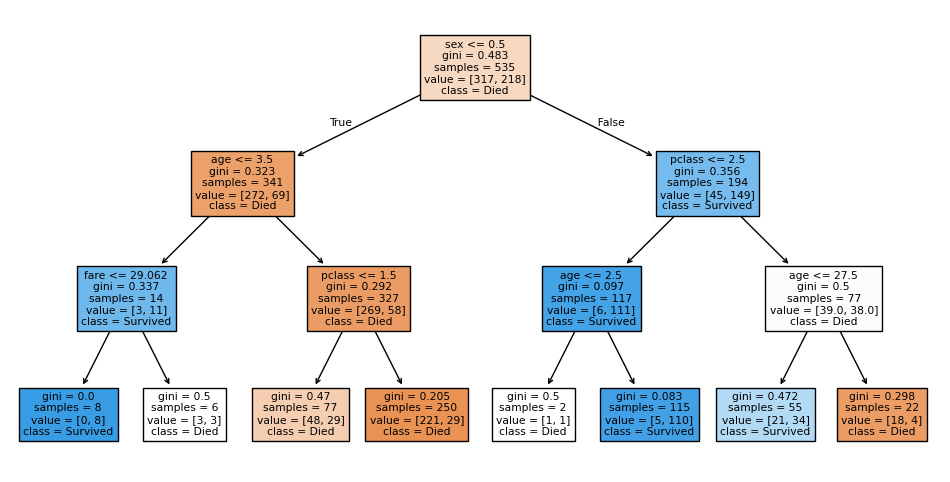

In [7]:
# Plot tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=["Died","Survived"], filled=True)
plt.show()